In [158]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble

%matplotlib inline

In [77]:
df = pd.read_csv("data.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [142]:
df["diagnosis"].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [96]:
# Prepare features and target variable
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Make target into numeric binary value
le = LabelEncoder()
y = le.fit_transform(y)

# Create test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression

In [199]:
model = ["Logistic Regression", "Ridge Regression", "Lasso Regression",
         "K Nearest Neighbors", "Decision Tree", "Random Forest"]
cross_val_acc = []
cross_val_range = []
test_acc = []
run_time = []

In [200]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

start_time = time.time()
log_pipe = Pipeline([("scr", StandardScaler()), ("log_reg", LogisticRegression())])
gs = GridSearchCV(estimator=log_pipe,
                 param_grid={"log_reg__C": param_range}, 
                 scoring="accuracy", 
                 cv=2)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time
print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))

GridSearch best score: 0.980
GridSearch best param(s): {'log_reg__C': 1.0}
Cross validation accuracy: 0.970
Cross validation range: 0.038

--- 0.35043 seconds ---


In [201]:
log_reg_best = gs.best_estimator_
log_reg_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

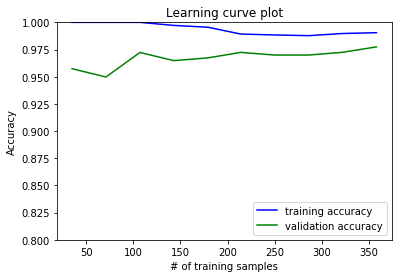

In [202]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=log_reg_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

(569, 30)


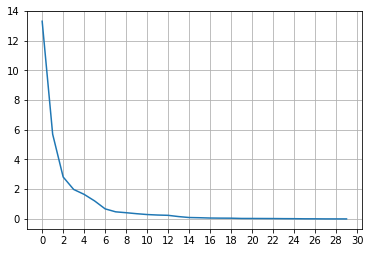

In [203]:
scl = StandardScaler()
scaled_X = scl.fit_transform(X)

pca = PCA(n_components=30)
x_pca = pca.fit_transform(scaled_X)
print(x_pca.shape)

plt.plot(pca.explained_variance_)
plt.grid()
plt.xticks(np.arange(0, 31, 2))
plt.show()

Looks like the bend is around two components.

In [204]:
start_time = time.time()
log_pipe = Pipeline([("scr", StandardScaler()),
                     ("pca", PCA(n_components=2)),
                     ("log_reg", LogisticRegression())])
gs = GridSearchCV(estimator=log_pipe,
                 param_grid={"log_reg__C": param_range}, 
                 scoring="accuracy", 
                 cv=2)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time

print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))

cross_val_acc.append(np.mean(scores))
cross_val_range.append(np.max(scores) - np.min(scores))
run_time.append(total_time)

GridSearch best score: 0.947
GridSearch best param(s): {'log_reg__C': 0.1}
Cross validation accuracy: 0.937
Cross validation range: 0.062

--- 0.41068 seconds ---


In [205]:
log_reg_best = gs.best_estimator_
log_reg_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

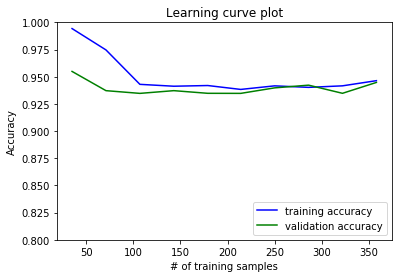

In [206]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=log_reg_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

In [207]:
print("Accuracy score: {:.3f}".format(log_reg_best.score(X_test, y_test)))
test_acc.append(log_reg_best.score(X_test, y_test))

Accuracy score: 0.971


## Ridge Regression

In [208]:
start_time = time.time()
ridge_pipe = Pipeline([("scr", StandardScaler()),
                       ("pca", PCA(n_components=2)),
                       ("ridge_reg", RidgeClassifier())])
gs = GridSearchCV(estimator=ridge_pipe,
                 param_grid={"ridge_reg__alpha": param_range}, 
                 scoring="accuracy", 
                 cv=2)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time
print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))
cross_val_acc.append(np.mean(scores))
cross_val_range.append(np.max(scores) - np.min(scores))
run_time.append(total_time)

GridSearch best score: 0.907
GridSearch best param(s): {'ridge_reg__alpha': 0.0001}
Cross validation accuracy: 0.915
Cross validation range: 0.137

--- 0.42810 seconds ---


In [209]:
ridge_reg_best = gs.best_estimator_
ridge_reg_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge_reg', RidgeClassifier(alpha=0.0001, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001))])

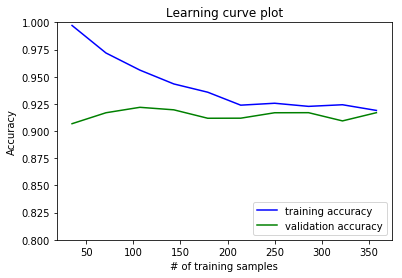

In [210]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=ridge_reg_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

In [211]:
print("Accuracy score: {:.3f}".format(ridge_reg_best.score(X_test, y_test)))
test_acc.append(ridge_reg_best.score(X_test, y_test))

Accuracy score: 0.942


## Lasso Regression
LogisticRegression with "l1" penalty.

In [212]:
start_time = time.time()
lasso_pipe = Pipeline([("scr", StandardScaler()),
                       ("pca", PCA(n_components=2)),
                       ("lasso", LogisticRegression(penalty="l1"))])
gs = GridSearchCV(estimator=lasso_pipe,
                 param_grid={"lasso__C": param_range}, 
                 scoring="accuracy", 
                 cv=2)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time

print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))
cross_val_acc.append(np.mean(scores))
cross_val_range.append(np.max(scores) - np.min(scores))
run_time.append(total_time)

GridSearch best score: 0.950
GridSearch best param(s): {'lasso__C': 1.0}
Cross validation accuracy: 0.937
Cross validation range: 0.075

--- 0.45469 seconds ---


In [213]:
lasso_reg_best = gs.best_estimator_
lasso_reg_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lasso', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

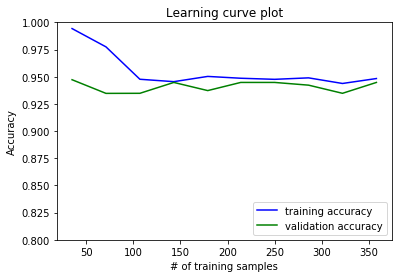

In [214]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=lasso_reg_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

In [215]:
print("Accuracy score: {:.3f}".format(lasso_reg_best.score(X_test, y_test)))
test_acc.append(lasso_reg_best.score(X_test, y_test))

Accuracy score: 0.971


## K Nearest Neighbors

In [216]:
start_time = time.time()
knn_pipe = Pipeline([("scr", StandardScaler()),
                     ("pca", PCA(n_components=2)),
                     ("knn", KNeighborsClassifier())])
gs = GridSearchCV(estimator=knn_pipe,
                 param_grid={"knn__n_neighbors": list(range(1, 41)),
                            "knn__weights": ["uniform", "distance"]}, 
                 scoring="accuracy", 
                 cv=2)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time

print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))

cross_val_acc.append(np.mean(scores))
cross_val_range.append(np.max(scores) - np.min(scores))
run_time.append(total_time)

GridSearch best score: 0.930
GridSearch best param(s): {'knn__n_neighbors': 13, 'knn__weights': 'uniform'}
Cross validation accuracy: 0.927
Cross validation range: 0.100

--- 5.45476 seconds ---


In [217]:
knn_best = gs.best_estimator_
knn_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scr', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'))])

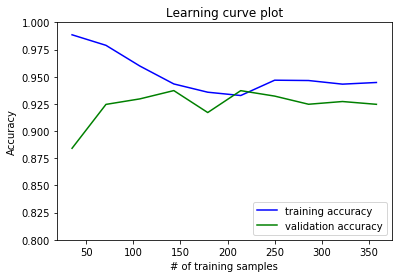

In [218]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=knn_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

In [219]:
print("Accuracy score: {:.3f}".format(knn_best.score(X_test, y_test)))
test_acc.append(knn_best.score(X_test, y_test))

Accuracy score: 0.959


## Decision Tree

In [220]:
start_time = time.time()
dec_tree_pipe = Pipeline([("dec_tree", DecisionTreeClassifier())])
gs = GridSearchCV(estimator=dec_tree_pipe,
                 param_grid={"dec_tree__criterion": ["gini", "entropy"],
                            "dec_tree__max_depth": [1, 2, 3, 4, 5, 6, 7, None],
                            "dec_tree__max_features": [1, 2, 3, 4, 5, 6, 7, None]}, 
                 scoring="accuracy", 
                 cv=2)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time

print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))

cross_val_acc.append(np.mean(scores))
cross_val_range.append(np.max(scores) - np.min(scores))
run_time.append(total_time)

GridSearch best score: 0.940
GridSearch best param(s): {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 3, 'dec_tree__max_features': 5}
Cross validation accuracy: 0.927
Cross validation range: 0.113

--- 3.57078 seconds ---


In [221]:
dec_tree_best = gs.best_estimator_
dec_tree_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('dec_tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

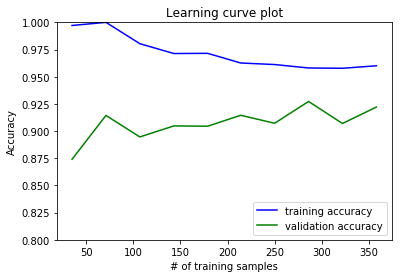

In [222]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=dec_tree_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

In [223]:
print("Accuracy score: {:.3f}".format(dec_tree_best.score(X_test, y_test)))
test_acc.append(dec_tree_best.score(X_test, y_test))

Accuracy score: 0.930


## Random Forest

In [224]:
start_time = time.time()
rf_pipe = Pipeline([("rfc", ensemble.RandomForestClassifier())])
gs = GridSearchCV(estimator=rf_pipe,
                 param_grid={"rfc__n_estimators": list(range(1, 20)),
                            "rfc__criterion": ["gini", "entropy"],
                            "rfc__max_depth": [1, 2, 3, 4, 5, 6, 7, None],
                            "rfc__max_features": [1, 2, 3, 4, 5, 6, 7, None]}, 
                 scoring="accuracy", 
                 cv=2,
                 n_jobs=-1)
gs = gs.fit(X_train, y_train)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=5)
total_time = time.time() - start_time

print("GridSearch best score: {:.3f}".format(gs.best_score_))
print("GridSearch best param(s): {}".format(gs.best_params_))
print("Cross validation accuracy: {:.3f}\nCross validation range: {:.3f}".format(np.mean(scores),
                                                                                (np.max(scores) - np.min(scores))))
print("\n--- {:.5f} seconds ---".format(total_time))

cross_val_acc.append(np.mean(scores))
cross_val_range.append(np.max(scores) - np.min(scores))
run_time.append(total_time)

GridSearch best score: 0.962
GridSearch best param(s): {'rfc__criterion': 'gini', 'rfc__max_depth': 4, 'rfc__max_features': 2, 'rfc__n_estimators': 17}
Cross validation accuracy: 0.935
Cross validation range: 0.050

--- 127.27907 seconds ---


In [225]:
rf_best = gs.best_estimator_
rf_best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

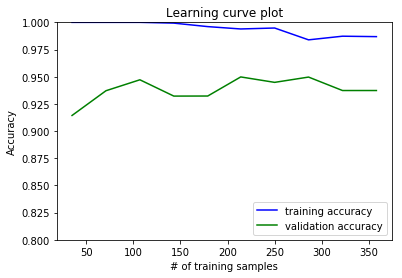

In [226]:
train_sizes, train_scores, test_scores =\
learning_curve(estimator=rf_best, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", label="training accuracy")
plt.plot(train_sizes, test_mean, color="green", label="validation accuracy")
plt.title("Learning curve plot")
plt.xlabel("# of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.80, 1.0])
plt.show()

In [227]:
print("Accuracy score: {:.3f}".format(rf_best.score(X_test, y_test)))
test_acc.append(rf_best.score(X_test, y_test))

Accuracy score: 0.965


In [237]:
summary = pd.DataFrame({"model": model, "cross_val_acc": cross_val_acc,
                       "cross_val_range": cross_val_range,
                       "test_acc": test_acc,
                       "run_time": run_time})
summary[["model", "cross_val_acc", "cross_val_range", "test_acc", "run_time"]]

,model,cross_val_acc,cross_val_range,test_acc,run_time
0,Logistic Regression,0.937215,0.0625,0.970760,0.410676
1,Ridge Regression,0.914557,0.1375,0.941520,0.428097
2,Lasso Regression,0.937247,0.0750,0.970760,0.454694
3,K Nearest Neighbors,0.927152,0.1000,0.959064,5.454761
4,Decision Tree,0.927215,0.1125,0.929825,3.570776
5,Random Forest,0.934715,0.0500,0.964912,127.279068
